In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

In [2]:
#test data
test_df = pd.read_csv("test_df.csv")
# Drop Y column
#X_test = test_df.drop(['is_corona_positive'], axis=1).to_numpy()
#y_test = test_df.is_corona_positive.astype(int).to_numpy()

#train data
train_df = pd.read_csv("train_df.csv")
# Drop Y column
X_train = train_df.drop(['is_corona_positive'], axis=1).to_numpy()
y_train = train_df.is_corona_positive.astype(int).to_numpy()

#test data
valid_df = pd.read_csv("valid_df.csv")
# Drop Y column
#X_valid = valid_df.drop(['is_corona_positive'], axis=1).to_numpy()
#y_valid = valid_df.is_corona_positive.astype(int).to_numpy()

In [3]:
#Create Support Vector Classifier model with default parameters and train on training data
SVC_model = SVC().fit(X_train, y_train)
#predicted y for training set
y_pred_train = SVC_model.predict(X_train)
# predicted y for test set
#y_pred_test = SVC_model.predict(X_test)
# tuple of precision, recall, f1 and support for training set
res_train = precision_recall_fscore_support(y_train, y_pred_train)
# tuple of precision, recall, f1 and support for test set
#res_test = precision_recall_fscore_support(y_test, y_pred_test)
res_train

#display key metrics
#print('The F1 score for the training set is {:.2f} \nThe F1 score for the test set is {:.2f}'.format(
#    f1_score(y_train, y_pred_train, average = 'macro'), f1_score(y_test, y_pred_test, average = 'macro')))
#print('For the Non Hazardous class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
#    res_train[0][0], res_test[0][0]))
#print('For the Non Hazardous class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
#    res_train[1][0], res_test[1][0]))
#print('For the Hazardous class the precision is {:.2f} for the training set and it is {:.2f} on the test set'.format(
#    res_train[0][1], res_test[0][1]))
#print('For the Hazardous class the recall is {:.2f} for the training set and it is {:.2f} on the test set'.format(
#    res_train[1][1], res_test[1][1]))



(array([0.99926469, 0.99425048]),
 array([0.99766413, 0.99818585]),
 array([0.99846377, 0.99621428]),
 array([194788,  78825], dtype=int64))

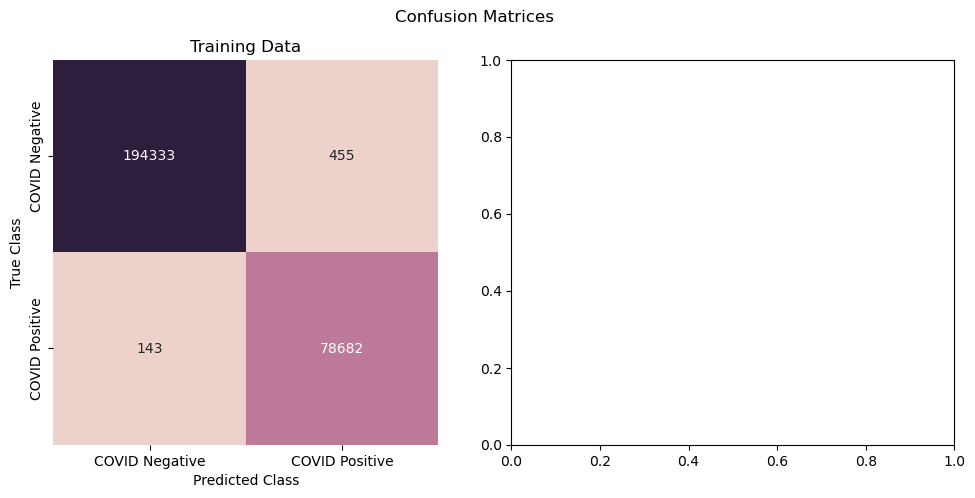

In [5]:
# function to plot confusion matrices
def plot_cnf(y_true, y_pred, ax, title):
    labs = ['COVID Negative', 'COVID Positive']
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat,annot=True,fmt='d',cbar=False, xticklabels= labs, yticklabels= labs,ax = ax,
                square = True, cmap=sns.cubehelix_palette(as_cmap=True))
    ax.set_ylabel('True Class')
    ax.set_xlabel('Predicted Class')
    ax.set_title(title)
# Generate figure with 2 subplots
fig, axs =  plt.subplots(1,2, figsize = (12,5))
# plot confusion matrices
plot_cnf(y_train, y_pred_train, axs[0], "Training Data")
#plot_cnf(y_test, y_pred_test, axs[1], "Test Data")
fig.suptitle('Confusion Matrices')
fig.subplots_adjust(wspace=0.1)
plt.show()